<b>¡Hola Sebastian!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Proyecto Sprint 10

## Descripción del proyecto

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.
Necesitamos predecir si un cliente dejará el banco pronto.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 
Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

## Manipulación de datos

In [1]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt

#Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Herramientas
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Visualisamos primero el DataFrame
df = pd.read_csv("Churn.csv", sep=",")

print(df)
print()
print(df.info())

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

Podemos ver que la columna "Tenure" tiene aproximadaamente un 9% de valores nulos.

La columna hace referencia a cuantos años ha mantenido un cliente una cantidad de dinero en una cuenta de ahorro. Este al ser un servicio importante para los usuarios del banco se optara por reemplazar los valores nulos por "0" haciendo referencia a que el cliente no esta usando este servicio. 

In [3]:
#Reemplazamos los valores nulos por 0
df["Tenure"] = df["Tenure"].fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


<div class="alert alert-block alert-success">
<b>Celdas [1–3]</b> <a class="tocSkip"></a><br>
Excelente inicio. Se cargan correctamente los datos, se identifican valores nulos y se justifican con criterio claro (rellenar "Tenure" con 0 tiene sentido práctico en este contexto). El preprocesamiento es transparente y coherente con el objetivo del modelo.
</div>


## Empezando el entrenamiento del modelo

### Codificacion

In [4]:
#Vamos a contar los valores unicos de las caracterisitcas que contengan valores de tipo String
print(df["Surname"].nunique())
print()
print(df["Geography"].nunique())
print()
print(df["Gender"].nunique())



2932

3

2


Viendo los valores unicos de las caracteristicas que tienen dato que no son de tipo numerico podemos var que la columna "Surname" contiene muchos valores unicos, lo cual es malo para entrenar un modelo, de hecho si aplicamos el metodo de codificacion OHE nos va a crear muchas columnas. Afortunadamente este tipo de dato es irrelevante para entrenamiento, por lo que la vamos a eliminar.

Tambien, vamos a eliminar todas las caracteristicas que no tengan una relacion con el objetivo del modelo. Por lo que las columnas "RowNumber" y "CustomerId" tambien se van.

In [5]:
#eliminamos columnas
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=True)

In [6]:
#Aplicamos la tecnica One-Hot Encoding para transformar las caracteristicas categaricas en numericas y eliminamos las caracteristicas dummy
data_ohe = pd.get_dummies(df, drop_first=True)
print(data_ohe)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42     2.0       0.00              1          1   
1             608   41     1.0   83807.86              1          0   
2             502   42     8.0  159660.80              3          1   
3             699   39     1.0       0.00              2          0   
4             850   43     2.0  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39     5.0       0.00              2          1   
9996          516   35    10.0   57369.61              1          1   
9997          709   36     7.0       0.00              1          0   
9998          772   42     3.0   75075.31              2          1   
9999          792   28     0.0  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1          

<div class="alert alert-block alert-success">
<b>Celdas [4–6]</b> <a class="tocSkip"></a><br>
Muy buen criterio al eliminar variables irrelevantes como "Surname" o "CustomerId", que podrían introducir ruido. También se aplicó correctamente One-Hot Encoding, conservando sólo las variables necesarias y evitando la multicolinealidad con `drop_first=True`.
</div>


### Division del DataFrame en conjuntos

In [7]:
#Imprimimos el largo del DataFrame como referencia
print("Datos fuente(total de datos):", len(df))
print()


#Separamos los datos en tres conjuntos, uno para entrenar el modelo, otro para validarlo y el ultimo para probarlo. con una proporcion de 3:1:1.
#Al mismo tiempo dividimos el DataFrame original en dos, uno con el objetivo y el otro con las caracteristicas.

df_train_and_test, df_valid = train_test_split(data_ohe, test_size=0.20, random_state=1)

df_train, df_test = train_test_split(df_train_and_test, test_size=0.25, random_state=1)

#Entrenamiento 60%
features_train = df_train.drop(["Exited"], axis=True)
target_train = df_train["Exited"]
print("Datos de entrenamiento: ", len(features_train))

#Validacion 20%
features_valid = df_valid.drop(["Exited"], axis=True)
target_valid = df_valid["Exited"]
print()
print("Datos de validacion: ", len(features_valid))

#Prueba 20%
features_test = df_test.drop(["Exited"], axis=True)
target_test = df_test["Exited"]
print()
print("Datos de prueba: ", len(features_test))

Datos fuente(total de datos): 10000

Datos de entrenamiento:  6000

Datos de validacion:  2000

Datos de prueba:  2000


### Arbol de Decision

#### Ajuste del hiperparametro

In [8]:
#empezaremos con el arbol de decision, iterando sobre el hiperparametro de profundidad maxima para ajustar la exactitud.
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=10, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = round(accuracy_score(target_valid, predictions_valid), 4)
    print("Con una profundidad maxima de {} obtenemos una exactitud de: {}".format(depth, accuracy))

Con una profundidad maxima de 1 obtenemos una exactitud de: 0.7925
Con una profundidad maxima de 2 obtenemos una exactitud de: 0.8315
Con una profundidad maxima de 3 obtenemos una exactitud de: 0.8395
Con una profundidad maxima de 4 obtenemos una exactitud de: 0.848
Con una profundidad maxima de 5 obtenemos una exactitud de: 0.855
Con una profundidad maxima de 6 obtenemos una exactitud de: 0.8505
Con una profundidad maxima de 7 obtenemos una exactitud de: 0.849
Con una profundidad maxima de 8 obtenemos una exactitud de: 0.849
Con una profundidad maxima de 9 obtenemos una exactitud de: 0.84
Con una profundidad maxima de 10 obtenemos una exactitud de: 0.8325


Vemos que el resultado mas exacto fue el que tiene una profundidad de 5.

#### Entrenamiento y Validacion

In [9]:
#conociendo el ajuste del hiperparametro volvemos a entrenar el modelo desde el principio de forma ordenada

#creacion de modelo con una profundidad maxima de 5
model_decision_tree = DecisionTreeClassifier(random_state=11, max_depth=5)

#entrenamiento
model_decision_tree.fit(features_train, target_train)

#validacion
predictions_valid = model_decision_tree.predict(features_valid)
accuracy = round(accuracy_score(target_valid, predictions_valid), 4)
print("Con una profundidad maxima de 5 obtenemos una exactitud de: {} con los datos de validacion".format(accuracy))
print()

#prueba con conjunto de datos desconocidos
#predictions_test = model_decision_tree.predict(features_test)
#accuracy_test = round(accuracy_score(target_test, predictions_test), 4)
#print("Obtuvimos una exactitud de: {} con los datos de prueba".format(accuracy_test))



Con una profundidad maxima de 5 obtenemos una exactitud de: 0.855 con los datos de validacion



<div class="alert alert-block alert-success">
<b>Celdas [7–9]</b> <a class="tocSkip"></a><br>
La división del dataset en conjuntos de entrenamiento, validación y prueba está bien estructurada. Además, se ajusta correctamente el hiperparámetro del árbol de decisión y se presenta de forma interpretativa. Se refleja un dominio básico sólido del flujo de modelado.
</div>


#### Prueba de Consistencia

Debemos comprobar el equilibrio de las clases o dicho de otro modo la relacion entre 1's (El cliente se fue) y 0's (El cliente no se fue). Lo ideal es que sea de 1:1.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

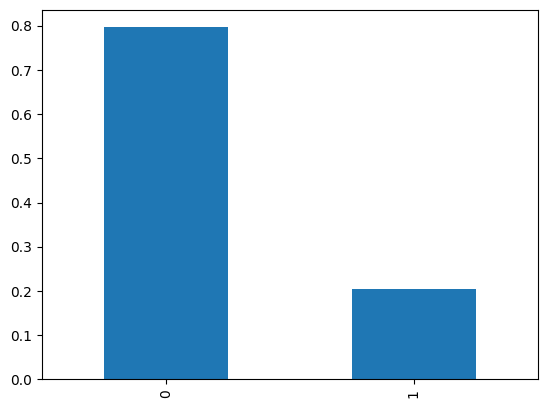

In [10]:
#Primero comprobaremos la frecuencia la variable objetivo.
class_frequency = df["Exited"].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

El el DataFrame completo vemos una ralacion de 80/20. Un Pareto en toda regla.

0    0.8965
1    0.1035
dtype: float64


<AxesSubplot:>

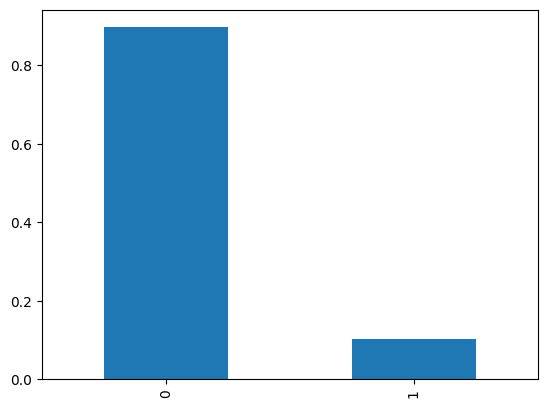

In [11]:
#Hacemos lo mismo pero con la frecuencia de las predicciones
class_frequency_pred = pd.Series(predictions_valid).value_counts(normalize=True)
print(class_frequency_pred)
class_frequency_pred.plot(kind='bar')

Vemos que el modelo estimo de forma optimista un 90/10.

In [12]:
#serie de datos que solo contiene 0
target_pred_constant = pd.Series(0, index=target_valid.index)

print(accuracy_score(target_valid, target_pred_constant))

0.7925


<div class="alert alert-block alert-warning">
<b>Celdas [10–12]</b> <a class="tocSkip"></a><br>
Es muy positivo que analices el desequilibrio de clases y compares con un modelo constante. Sin embargo, podrías complementar esta parte con el valor de F1 del modelo base (solo predice 0) para tener una referencia más justa que la simple exactitud. Esto haría tu análisis más riguroso.
</div>


En un modelo constante tenemos una exactitud del 79.2%. 

Si bien es mejor que hacer predicciones aleatorias, no tiene mucho sentido entrenar un modelo que alcanza una exactitud del 85% si con solo estimar que ningun cliente se va a ir del banco alcanzamos una exactitud de casi del 80%.

#### Conclusion

Debido a la relacion desigual entre clases estamos obteniendo resultados insatisfactorios con el entrenamiento del modelo.

Para resolver esto debemos equilibrar las clases.

### Equilibrio de Clases

#### Calculando el error

Primero tenemos que comprobar los Verdaderos Positivos (VP), Verdaderos Negativos (VN), Falsos Positivos (FP) y Falsos Negativos (FN).

[[1544   41]
 [ 249  166]]


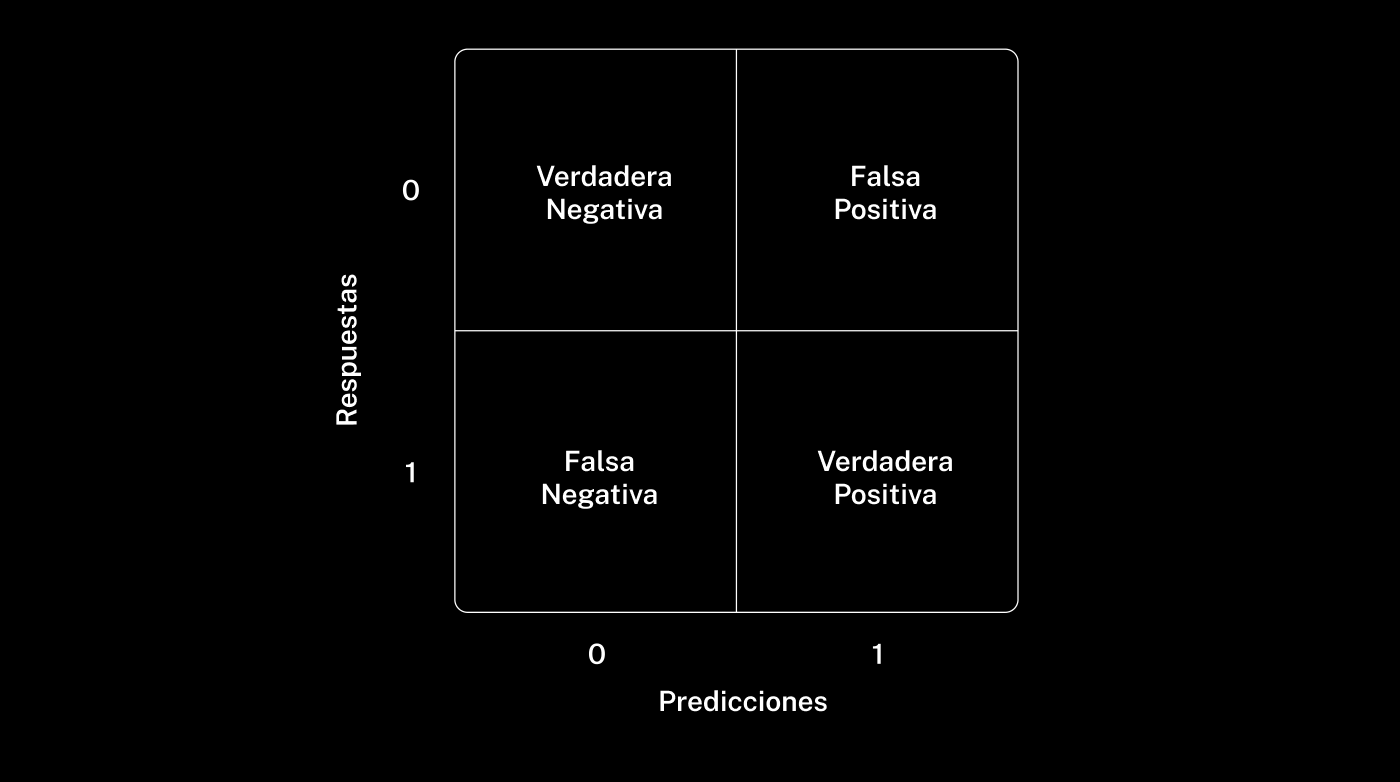

In [13]:
#Mandamos a imprimir la matriz de confusion
print(confusion_matrix(target_valid, predictions_valid))

#Adicionalmente mostramos una imagen para que sea mas facil interpretar la matriz
from IPython.display import Image
Image("moved_8.3.9ES.png", )

Ahora vamos a calcular mas metricas

In [14]:
#imprimiremos primero las metricas de recall y precision
print("El Recall es de:" ,recall_score(target_valid, predictions_valid))
print("La Precision es de:" ,round(precision_score(target_valid, predictions_valid), 3))

El Recall es de: 0.4
La Precision es de: 0.802


Sabiendo que Recall mide la proporcion de verdaderos positivos que el modelo logro identificar correctamente. Y la precision mide la proporcion de predicciones positivas que realmente son correctas.

Precision se preocupa de no equivocarse al decir que algo es positivo.

Recall se preocupa de no perderse ningún positivo verdadero.


Podriamos decir que el modelo es tiene una precision aceptable pero no comprende muy bien la relacion de las caracteristicas con el objetivo.

Entonces mas bien le atina por suerte, lo cual no es bueno. 🫠

In [15]:
#Veamos la relacion entre recall y precision
print("La media armonica o F1 es de:", round(f1_score(target_valid, predictions_valid), 3))

La media armonica o F1 es de: 0.534


<div class="alert alert-block alert-success">
<b>Celdas [13–15]</b> <a class="tocSkip"></a><br>
Excelente interpretación de la matriz de confusión y de las métricas de evaluación. Usas correctamente precision, recall y F1-score, y explicas su significado con claridad y sentido práctico. Muy buen trabajo comunicando el porqué del mal desempeño inicial del modelo.
</div>


Con este resultado no es de extrañar el mal desempeño del modelo. Es hora de corregirlo.

#### Equilibrando las Clases

##### Ajuste del Peso de Clases

In [16]:
#Ajuestamos el hiperparametro
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=1000, max_depth=depth, class_weight="balanced")
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = round(accuracy_score(target_valid, predictions_valid), 4)
    f1 = round(f1_score(target_valid, predictions_valid), 3)
    print("Con una profundidad maxima de {} obtenemos una exactitud de: {} y un F1 de: {}".format(depth, accuracy, f1))

Con una profundidad maxima de 1 obtenemos una exactitud de: 0.7335 y un F1 de: 0.511
Con una profundidad maxima de 2 obtenemos una exactitud de: 0.74 y un F1 de: 0.533
Con una profundidad maxima de 3 obtenemos una exactitud de: 0.76 y un F1 de: 0.551
Con una profundidad maxima de 4 obtenemos una exactitud de: 0.728 y un F1 de: 0.55
Con una profundidad maxima de 5 obtenemos una exactitud de: 0.766 y un F1 de: 0.581
Con una profundidad maxima de 6 obtenemos una exactitud de: 0.783 y un F1 de: 0.596
Con una profundidad maxima de 7 obtenemos una exactitud de: 0.7725 y un F1 de: 0.584
Con una profundidad maxima de 8 obtenemos una exactitud de: 0.806 y un F1 de: 0.598
Con una profundidad maxima de 9 obtenemos una exactitud de: 0.7795 y un F1 de: 0.571
Con una profundidad maxima de 10 obtenemos una exactitud de: 0.782 y un F1 de: 0.56


In [17]:
#creacion del modelo
model_decision_tree_balanced = DecisionTreeClassifier(random_state=1000, max_depth=8, class_weight="balanced")

#entrenamiento
model_decision_tree_balanced.fit(features_train, target_train)

#validacion
predictions_valid_balanced = model_decision_tree_balanced.predict(features_valid)

print("Resultados despues de equilibrar las clases:")
print()
print("Exactitud:", round(accuracy_score(target_valid, predictions_valid_balanced), 4))
print()
print("Recall:" ,round(recall_score(target_valid, predictions_valid_balanced), 3))
print()
print("Precision:" ,round(precision_score(target_valid, predictions_valid_balanced), 3))
print()
print("F1:", round(f1_score(target_valid, predictions_valid_balanced), 3))

Resultados despues de equilibrar las clases:

Exactitud: 0.806

Recall: 0.696

Precision: 0.525

F1: 0.598


Tambien podemos comprobar la curva ROC que relaciona la tasa de falsos positivos y verdaderos positivos.

In [18]:
#Con la funcion .predict_proba sacamos una matriz que contiene la prediccion de la probabilidad de clase, en donde: 
#indice 0 = probabilidad de clase negativa o 0
#indice 1 = probabilidad de clase positiva o 1
probabilities_valid = model_decision_tree_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#Sacamos el area bajo la curba o AUC_ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("Tenemos un area bajo la curva de: ", round(auc_roc, 3))

Tenemos un area bajo la curva de:  0.811


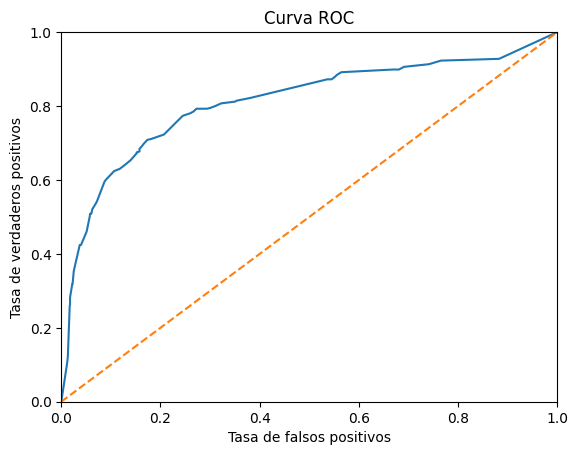

In [19]:
#Graficamos la curva
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [20]:
#Prueba
predictions_test_balanced = model_decision_tree_balanced.predict(features_test)

print("Resultados:")
print()
print("Exactitud:", round(accuracy_score(target_test, predictions_test_balanced), 4))
print()
print("Recall:" ,round(recall_score(target_test, predictions_test_balanced), 3))
print()
print("Precision:" ,round(precision_score(target_test, predictions_test_balanced), 3))
print()
print("F1:", round(f1_score(target_test, predictions_test_balanced), 3))
print()

probabilities_test = model_decision_tree_balanced.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print("Tenemos un area bajo la curva de: ", round(roc_auc_score(target_test, probabilities_one_test), 3))

Resultados:

Exactitud: 0.7845

Recall: 0.694

Precision: 0.486

F1: 0.572

Tenemos un area bajo la curva de:  0.787


<div class="alert alert-block alert-success">
<b>Celdas [16–20]</b> <a class="tocSkip"></a><br>
Muy bien aplicado el ajuste de pesos de clase. El modelo mejora significativamente su F1 y se presenta tanto la métrica como la curva ROC-AUC de forma clara. También se incluye evaluación sobre el set de prueba, lo cual es clave para validar generalización. Bien hecho.
</div>


##### Conclusion

Vemos que con los datos de validacion el valor de F1 cumple con el rquisito del ejercicio. Sin embargo, el valor de F1 es insuficiente con los datos de prueba por 18 milesimas.

Sin embargo, podemos intentar otros metodos para el equilibro de clases como el sobremuestreo o el submuestreo. Para ver si obtenemos mejores resultados.

##### Sobremuestreo

In [21]:
#Separamos las clases y el objetivo en 0 y 1. Las multiplicamos por un factor en este caso de 10 y las reburujamos con shuffle
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=20)

    return features_upsampled, target_upsampled

#Mandamos a llamar a la funcion
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

#Hacemos una comparativa entre la cantidad de valores de entrenamiento antes y despues del Sobremuestreo
print("Datos de entrenamiento antes del sobremuestreo: ", len(features_train))
print()
print("Datos de entrenamiento despues del sobremuestreo: ", len(features_upsampled))

Datos de entrenamiento antes del sobremuestreo:  6000

Datos de entrenamiento despues del sobremuestreo:  16863


In [22]:
#Ajuste del modelo
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=1000, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    accuracy = round(accuracy_score(target_valid, predictions_valid), 4)
    f1 = round(f1_score(target_valid, predictions_valid), 3)
    print("Con una profundidad maxima de {} obtenemos una exactitud de: {} y un F1 de: {}".format(depth, accuracy, f1))

Con una profundidad maxima de 1 obtenemos una exactitud de: 0.2075 y un F1 de: 0.344
Con una profundidad maxima de 2 obtenemos una exactitud de: 0.688 y un F1 de: 0.51
Con una profundidad maxima de 3 obtenemos una exactitud de: 0.506 y un F1 de: 0.448
Con una profundidad maxima de 4 obtenemos una exactitud de: 0.4995 y un F1 de: 0.445
Con una profundidad maxima de 5 obtenemos una exactitud de: 0.6015 y un F1 de: 0.479
Con una profundidad maxima de 6 obtenemos una exactitud de: 0.626 y un F1 de: 0.497
Con una profundidad maxima de 7 obtenemos una exactitud de: 0.6675 y un F1 de: 0.514
Con una profundidad maxima de 8 obtenemos una exactitud de: 0.641 y un F1 de: 0.495
Con una profundidad maxima de 9 obtenemos una exactitud de: 0.678 y un F1 de: 0.514
Con una profundidad maxima de 10 obtenemos una exactitud de: 0.706 y un F1 de: 0.527


In [23]:
#creacion de modelo
model_decision_tree_balanced = DecisionTreeClassifier(random_state=1000, max_depth=10)

#entrenamiento
model_decision_tree_balanced.fit(features_upsampled, target_upsampled)

#validacion
predictions_valid_balanced = model_decision_tree_balanced.predict(features_valid)

print("Resultados despues de equilibrar las clases:")
print()
print("Exactitud:", round(accuracy_score(target_valid, predictions_valid_balanced), 4))
print()
print("Recall:" ,round(recall_score(target_valid, predictions_valid_balanced), 3))
print()
print("Precision:" ,round(precision_score(target_valid, predictions_valid_balanced), 3))
print()
print("F1:", round(f1_score(target_valid, predictions_valid_balanced), 3))

Resultados despues de equilibrar las clases:

Exactitud: 0.706

Recall: 0.788

Precision: 0.395

F1: 0.527


In [24]:
#Con la funcion .predict_proba sacamos una matriz que contiene la prediccion de la probabilidad de clase, en donde: 
#indice 0 = probabilidad de clase negativa o 0
#indice 1 = probabilidad de clase positiva o 1
probabilities_valid = model_decision_tree_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#Sacamos el area bajo la curba o AUC_ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7987609744973585


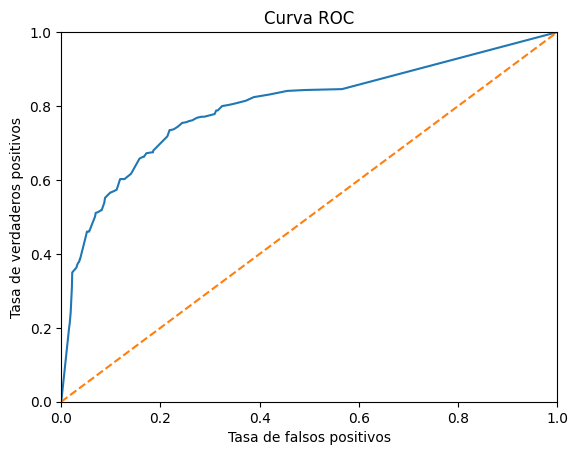

In [25]:
#Graficamos la curva
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [26]:
#Prueba
predictions_test_balanced = model_decision_tree_balanced.predict(features_test)

print("Resultados:")
print()
print("Exactitud:", round(accuracy_score(target_test, predictions_test_balanced), 4))
print()
print("Recall:" ,round(recall_score(target_test, predictions_test_balanced), 3))
print()
print("Precision:" ,round(precision_score(target_test, predictions_test_balanced), 3))
print()
print("F1:", round(f1_score(target_test, predictions_test_balanced), 3))
print()

probabilities_test = model_decision_tree_balanced.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print("Tenemos un area bajo la curva de: ", round(roc_auc_score(target_test, probabilities_one_test), 3))

Resultados:

Exactitud: 0.706

Recall: 0.733

Precision: 0.389

F1: 0.508

Tenemos un area bajo la curva de:  0.761


<div class="alert alert-block alert-success">
<b>Celdas [21–26]</b> <a class="tocSkip"></a><br>
Buen sobremuestreo, y bien implementado el procedimiento. En el modelo final, podrías agregar una tabla o resumen comparativo con las métricas clave (F1 y ROC-AUC) de todos los enfoques. Esto facilitaría ver claramente cuál fue el más efectivo.
</div>


##### Conclusion

Desafortunadamente obtuvimos un peor desempeño con el Sobremuestreo.

##### Submuestreo

In [27]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

#Hacemos una comparativa entre la cantidad de valores de entrenamiento antes y despues del Sobremuestreo
print("Datos de entrenamiento antes del sobremuestreo: ", len(features_train))
print()
print("Datos de entrenamiento despues del sobremuestreo: ", len(features_downsampled))

Datos de entrenamiento antes del sobremuestreo:  6000

Datos de entrenamiento despues del sobremuestreo:  1686


In [28]:
#Ajuste del modelo
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=1000, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    accuracy = round(accuracy_score(target_valid, predictions_valid), 4)
    f1 = round(f1_score(target_valid, predictions_valid), 3)
    print("Con una profundidad maxima de {} obtenemos una exactitud de: {} y un F1 de: {}".format(depth, accuracy, f1))

Con una profundidad maxima de 1 obtenemos una exactitud de: 0.2075 y un F1 de: 0.344
Con una profundidad maxima de 2 obtenemos una exactitud de: 0.688 y un F1 de: 0.51
Con una profundidad maxima de 3 obtenemos una exactitud de: 0.486 y un F1 de: 0.439
Con una profundidad maxima de 4 obtenemos una exactitud de: 0.5635 y un F1 de: 0.465
Con una profundidad maxima de 5 obtenemos una exactitud de: 0.68 y un F1 de: 0.532
Con una profundidad maxima de 6 obtenemos una exactitud de: 0.68 y un F1 de: 0.527
Con una profundidad maxima de 7 obtenemos una exactitud de: 0.613 y un F1 de: 0.485
Con una profundidad maxima de 8 obtenemos una exactitud de: 0.6315 y un F1 de: 0.496
Con una profundidad maxima de 9 obtenemos una exactitud de: 0.621 y un F1 de: 0.489
Con una profundidad maxima de 10 obtenemos una exactitud de: 0.6125 y un F1 de: 0.48


In [29]:
#creacion de modelo
model_decision_tree_downsamp = DecisionTreeClassifier(random_state=1000, max_depth=6)

#entrenamiento
model_decision_tree_downsamp.fit(features_downsampled, target_downsampled)

#validacion
predictions_valid_downsamp = model_decision_tree_downsamp.predict(features_valid)

print("Resultados despues de equilibrar las clases:")
print()
print("Exactitud:", round(accuracy_score(target_valid, predictions_valid_downsamp), 4))
print()
print("Recall:" ,round(recall_score(target_valid, predictions_valid_downsamp), 3))
print()
print("Precision:" ,round(precision_score(target_valid, predictions_valid_downsamp), 3))
print()
print("F1:", round(f1_score(target_valid, predictions_valid_downsamp), 3))

Resultados despues de equilibrar las clases:

Exactitud: 0.68

Recall: 0.858

Precision: 0.38

F1: 0.527


In [30]:
#Con la funcion .predict_proba sacamos una matriz que contiene la prediccion de la probabilidad de clase, en donde: 
#indice 0 = probabilidad de clase negativa o 0
#indice 1 = probabilidad de clase positiva o 1
probabilities_valid = model_decision_tree_downsamp.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#Sacamos el area bajo la curba o AUC_ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8177811561704229


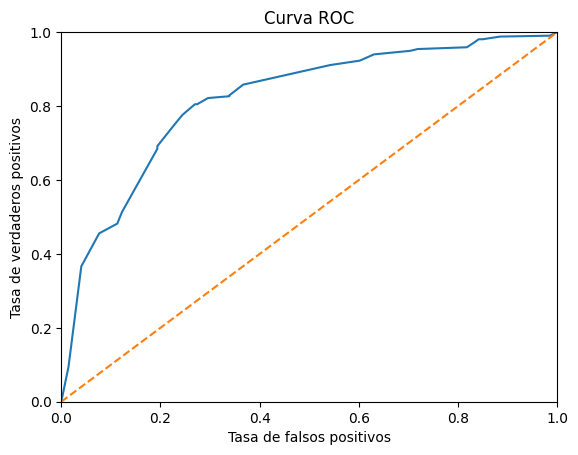

In [31]:
#Graficamos la curva
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [32]:
#Prueba
predictions_test_downsamp = model_decision_tree_downsamp.predict(features_test)

print("Resultados:")
print()
print("Exactitud:", round(accuracy_score(target_test, predictions_test_downsamp), 4))
print()
print("Recall:" ,round(recall_score(target_test, predictions_test_downsamp), 3))
print()
print("Precision:" ,round(precision_score(target_test, predictions_test_downsamp), 3))
print()
print("F1:", round(f1_score(target_test, predictions_test_downsamp), 3))
print()

probabilities_test = model_decision_tree_downsamp.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print("Tenemos un area bajo la curva de: ", round(roc_auc_score(target_test, probabilities_one_test), 3))

Resultados:

Exactitud: 0.6675

Recall: 0.836

Precision: 0.368

F1: 0.511

Tenemos un area bajo la curva de:  0.791


El equilibrio de clases con el metodo de Submuestreo fue poco mejor que con el metodo de Sobremuestreo.

Como ultima prueba podriamos comprobar si juntando dos metodos para equilibrar las clases obtenemos un resultado mejor. En este caso uniriamos el Submuestreo con el Ajuste de Pesos de clase, que fueron los que mostraron mejor desempeño.

##### Ajuste del Paso de Clases y Submuestreo

In [33]:
#Ajuste del modelo
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=1000, max_depth=depth, class_weight="balanced")
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    accuracy = round(accuracy_score(target_valid, predictions_valid), 4)
    f1 = round(f1_score(target_valid, predictions_valid), 3)
    print("Con una profundidad maxima de {} obtenemos una exactitud de: {} y un F1 de: {}".format(depth, accuracy, f1))

Con una profundidad maxima de 1 obtenemos una exactitud de: 0.7335 y un F1 de: 0.511
Con una profundidad maxima de 2 obtenemos una exactitud de: 0.74 y un F1 de: 0.533
Con una profundidad maxima de 3 obtenemos una exactitud de: 0.7925 y un F1 de: 0.557
Con una profundidad maxima de 4 obtenemos una exactitud de: 0.775 y un F1 de: 0.583
Con una profundidad maxima de 5 obtenemos una exactitud de: 0.7525 y un F1 de: 0.57
Con una profundidad maxima de 6 obtenemos una exactitud de: 0.7835 y un F1 de: 0.593
Con una profundidad maxima de 7 obtenemos una exactitud de: 0.745 y un F1 de: 0.565
Con una profundidad maxima de 8 obtenemos una exactitud de: 0.7255 y un F1 de: 0.54
Con una profundidad maxima de 9 obtenemos una exactitud de: 0.694 y un F1 de: 0.515
Con una profundidad maxima de 10 obtenemos una exactitud de: 0.676 y un F1 de: 0.509


In [34]:
#creacion de modelo
model_decision_tree_downsamp = DecisionTreeClassifier(random_state=1000, max_depth=6, class_weight="balanced")

#entrenamiento
model_decision_tree_downsamp.fit(features_downsampled, target_downsampled)

#validacion
predictions_valid_downsamp = model_decision_tree_downsamp.predict(features_valid)

print("Resultados despues de equilibrar las clases:")
print()
print("Exactitud:", round(accuracy_score(target_valid, predictions_valid_downsamp), 4))
print()
print("Recall:" ,round(recall_score(target_valid, predictions_valid_downsamp), 3))
print()
print("Precision:" ,round(precision_score(target_valid, predictions_valid_downsamp), 3))
print()
print("F1:", round(f1_score(target_valid, predictions_valid_downsamp), 3))

Resultados despues de equilibrar las clases:

Exactitud: 0.7835

Recall: 0.761

Precision: 0.486

F1: 0.593


In [35]:
#Con la funcion .predict_proba sacamos una matriz que contiene la prediccion de la probabilidad de clase, en donde: 
#indice 0 = probabilidad de clase negativa o 0
#indice 1 = probabilidad de clase positiva o 1
probabilities_valid = model_decision_tree_downsamp.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#Sacamos el area bajo la curba o AUC_ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8334688913382234


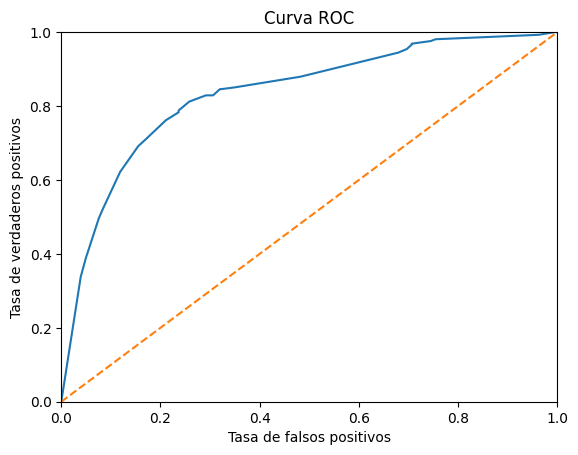

In [36]:
#Graficamos la curva
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [37]:
#Prueba
predictions_test_downsamp = model_decision_tree_downsamp.predict(features_test)

print("Resultados:")
print()
print("Exactitud:", round(accuracy_score(target_test, predictions_test_downsamp), 4))
print()
print("Recall:" ,round(recall_score(target_test, predictions_test_downsamp), 3))
print()
print("Precision:" ,round(precision_score(target_test, predictions_test_downsamp), 3))
print()
print("F1:", round(f1_score(target_test, predictions_test_downsamp), 3))
print()

probabilities_test = model_decision_tree_downsamp.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print("Tenemos un area bajo la curva de: ", round(roc_auc_score(target_test, probabilities_one_test), 3))

Resultados:

Exactitud: 0.754

Recall: 0.723

Precision: 0.443

F1: 0.549

Tenemos un area bajo la curva de:  0.799


##### Conclusion

Mejoro, pero aun quedo por detras del resultado de simplemente usar el metodo de Ajuste de Peso de Clase

## Conclusion General

Al final el mejor metodo de equilibrio de clases fue el Ajuste de Peso de Clase.

Si bien el valor de F1 con el conjunto de prueba no supero el minimo esperado en el ejercicio diria que se debe mas a las variaciones esperables de las pruebas que al modelo en si, ya que si vamos cambienado el parametro "random_state" podemos aumentar o disminuir el valor de F1, pero de eso no se trata el ejercicio. 

Aun asi, si se concidera que este resultado es insatisfactorio pues bueno, lo cambiare. 🤕

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Buen trabajo, Sebastián! Tu proyecto tiene una estructura clara, justificaciones bien argumentadas y una ejecución técnica sólida. Destacan tu análisis del desbalance de clases, la aplicación ordenada de varios métodos para resolverlo, y la evaluación honesta del modelo.  
Para portafolio, podrías agregar una tabla final comparando todos los métodos y F1 sobre test para reforzar tu argumento.  
En general, vas por un excelente camino en machine learning. ¡Sigue así!
</div>
